# **Jumboree Education**
Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

**Problem statement:**

Your analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

**Column Profiling:**

Serial No. (Unique row ID)

GRE Scores (out of 340)

TOEFL Scores (out of 120)

University Rating (out of 5)

Statement of Purpose and Letter of Recommendation Strength (out of 5)

Undergraduate GPA (out of 10)

Research Experience (either 0 or 1)

Chance of Admit (ranging from 0 to 1)

In [136]:
#Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [137]:
# Reading the dataset
df = pd.read_csv('jamboree_dataset.csv')

In [138]:
# First 5 rows of the dataset
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [139]:
# Checking the size of the dataset
df.shape

(500, 9)

It is dataset of 500 students.

In [140]:
# Checking the all the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [141]:
# Checking the missing values in all the columns
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

There are no missing values in the given dataset.

In [142]:
# Checking the duplicate values in the dataset
df.duplicated().sum()

0

No duplicates are there in the data.

In [143]:
# Statistical summary
df.describe().round(2)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,250.50,316.47,107.19,3.11,3.37,3.48,8.58,0.56,0.72
std,144.48,11.30,6.08,1.14,0.99,0.93,0.60,0.50,0.14
min,1.00,290.00,92.00,1.00,1.00,1.00,6.80,0.00,0.34
25%,125.75,308.00,103.00,2.00,2.50,3.00,8.13,0.00,0.63
50%,250.50,317.00,107.00,3.00,3.50,3.50,8.56,1.00,0.72
75%,375.25,325.00,112.00,4.00,4.00,4.00,9.04,1.00,0.82
max,500.00,340.00,120.00,5.00,5.00,5.00,9.92,1.00,0.97


# **Univariate analysis**

In [144]:
# Checking unique no. of values of all the continuous variables
col_name_plots = ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit ']

col_unique =[]
for col in col_name_plots:
    col_unique.append(df[col].nunique())

col_uni_df =pd.DataFrame({'Columns':col_name_plots, 'No_of_Unique_values':col_unique})
col_uni_df

,Columns,No_of_Unique_values
0,GRE Score,49
1,TOEFL Score,29
2,CGPA,184
3,Chance of Admit,61


In [145]:
# Value counts for GRE Score
df['GRE Score'].value_counts(bins=5,normalize=True)

(310.0, 320.0]      0.308
(320.0, 330.0]      0.282
(300.0, 310.0]      0.192
(330.0, 340.0]      0.112
(289.949, 300.0]    0.106
Name: GRE Score, dtype: float64

In [146]:
# Value counts for TOEFL Score
df['TOEFL Score'].value_counts(bins=5,normalize=True)

(108.8, 114.4]               0.296
(103.2, 108.8]               0.282
(97.6, 103.2]                0.252
(114.4, 120.0]               0.128
(91.97099999999999, 97.6]    0.042
Name: TOEFL Score, dtype: float64

In [147]:
# Value counts for CGPA
df['CGPA'].value_counts(bins=5,normalize=True)

(8.048, 8.672]                0.350
(8.672, 9.296]                0.312
(7.424, 8.048]                0.192
(9.296, 9.92]                 0.122
(6.795999999999999, 7.424]    0.024
Name: CGPA, dtype: float64

In [148]:
# Value counts for Chance of Admit
df['Chance of Admit '].value_counts(bins=5,normalize=True)

(0.718, 0.844]    0.310
(0.592, 0.718]    0.282
(0.844, 0.97]     0.218
(0.466, 0.592]    0.142
(0.338, 0.466]    0.048
Name: Chance of Admit , dtype: float64

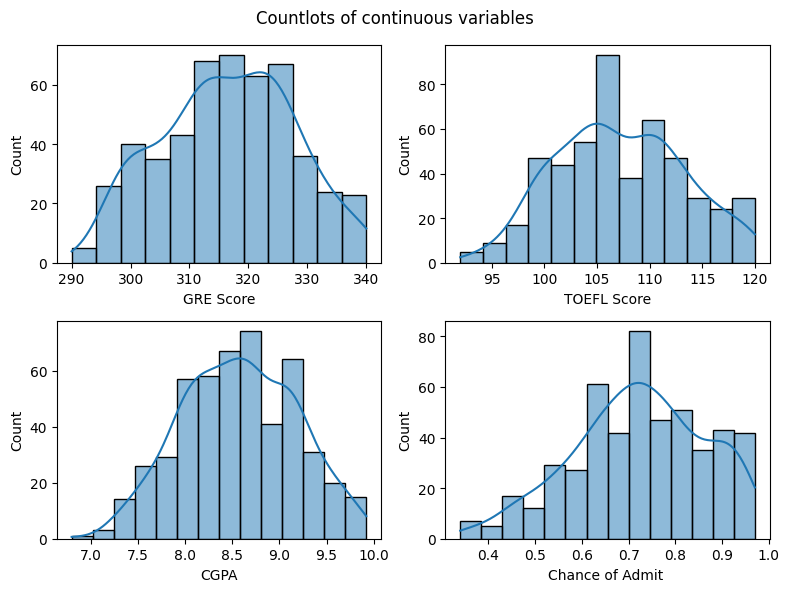

In [149]:
# Plotting distribution plots of all the continuous variables
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8,6))
fig.suptitle('Countlots of continuous variables')

for col, axe in zip(col_name_plots, axs.flatten()):
  sns.histplot(data=df, x=col, kde=True, ax=axe)

plt.tight_layout()
plt.show()


1) Almost 58% of students have GRE Score between 310-330

2) Almost 57% of students have TOEFL Score between 103-115

3) 65% of students have CGPA between 8.05-9.30

4) Almost 60% of students have Chance of Admit between 60-85%

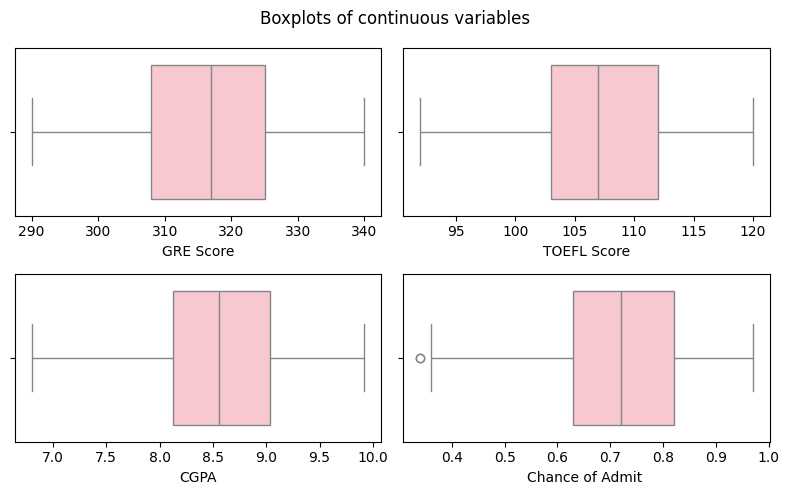

In [150]:
# Plotting boxplot plots of all the continuous variables for outliers presence
fig, axs = plt.subplots(nrows=2, ncols=2,figsize=(8,5))
fig.suptitle('Boxplots of continuous variables')

for col, axe in zip(col_name_plots, axs.flatten()):
  sns.boxplot(data=df,x=col,ax=axe,color='pink')

plt.tight_layout()
plt.show()

1) No outliers for GRE Score,TOEFL Score and CGPA.

2) Just one outlier in Change of Admit

In [151]:
# Value counts for LOR
df['LOR '].value_counts(bins=4,normalize=True)

(3.0, 4.0]      0.360
(2.0, 3.0]      0.298
(4.0, 5.0]      0.226
(0.995, 2.0]    0.116
Name: LOR , dtype: float64

In [152]:
# Value counts for SOP
df['SOP'].value_counts(bins=4,normalize=True)

(3.0, 4.0]      0.354
(2.0, 3.0]      0.288
(4.0, 5.0]      0.210
(0.995, 2.0]    0.148
Name: SOP, dtype: float64

In [153]:
# Value counts for University Rating
df['University Rating'].value_counts(bins=4,normalize=True)

(2.0, 3.0]      0.324
(0.995, 2.0]    0.320
(3.0, 4.0]      0.210
(4.0, 5.0]      0.146
Name: University Rating, dtype: float64

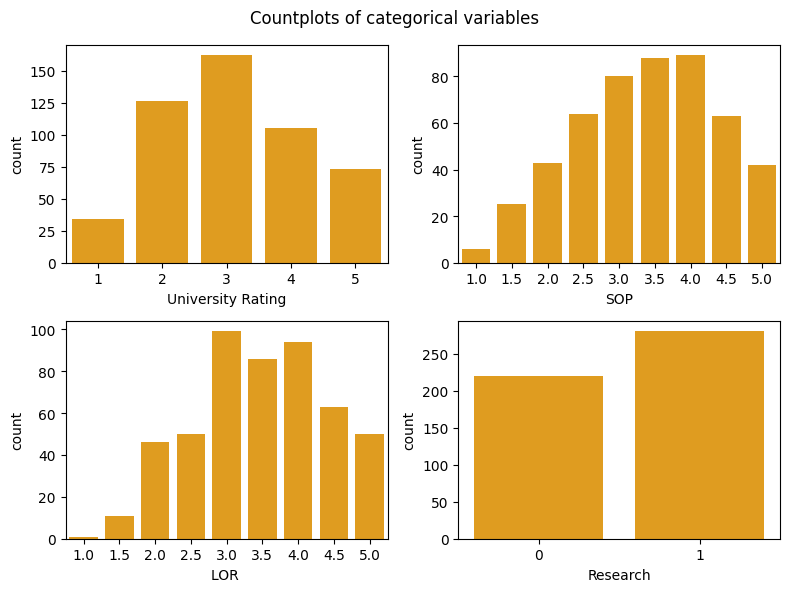

In [154]:
# Plotting bar plots of all the categorical variables
col_name_c = ['University Rating', 'SOP','LOR ','Research']

fig, axs = plt.subplots(nrows=2, ncols=2,figsize=(8,6))
fig.suptitle('Countplots of categorical variables')

for col, axe in zip(col_name_c, axs.flatten()):
  sns.countplot(data=df,x=col,ax=axe,color='orange')

plt.tight_layout()
plt.show()

1) Almost 65% of students have LOR between 2-4

2) Almost 63% of students have SOP between 2-4

3) Almost 65% of students have University Rating between 1-3

# **Bivariate Analysis**

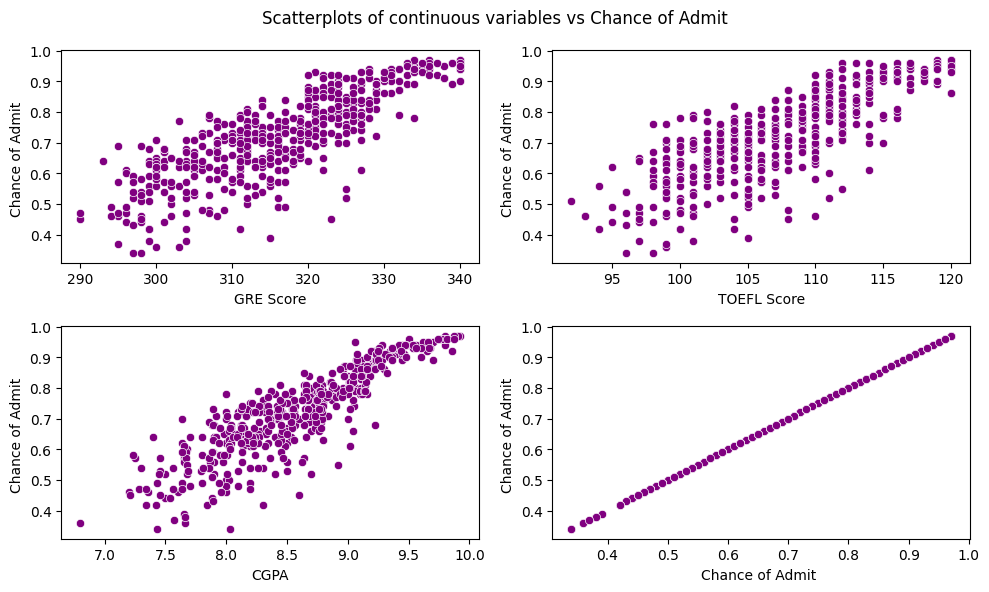

In [155]:
# Plotting scatterplots of continuous variables w.r.t. Chance of Admit
fig, axs = plt.subplots(nrows=2, ncols=2,figsize=(10,6))
fig.suptitle('Scatterplots of continuous variables vs Chance of Admit')

for col, axe in zip(col_name_plots, axs.flatten()):
    sns.scatterplot(data=df, x=col, y='Chance of Admit ', ax=axe, color='purple')

plt.tight_layout()
plt.show()

1) GRE Score, TOEFL Score and CGPA have positive linear correlation with Chance of Admit

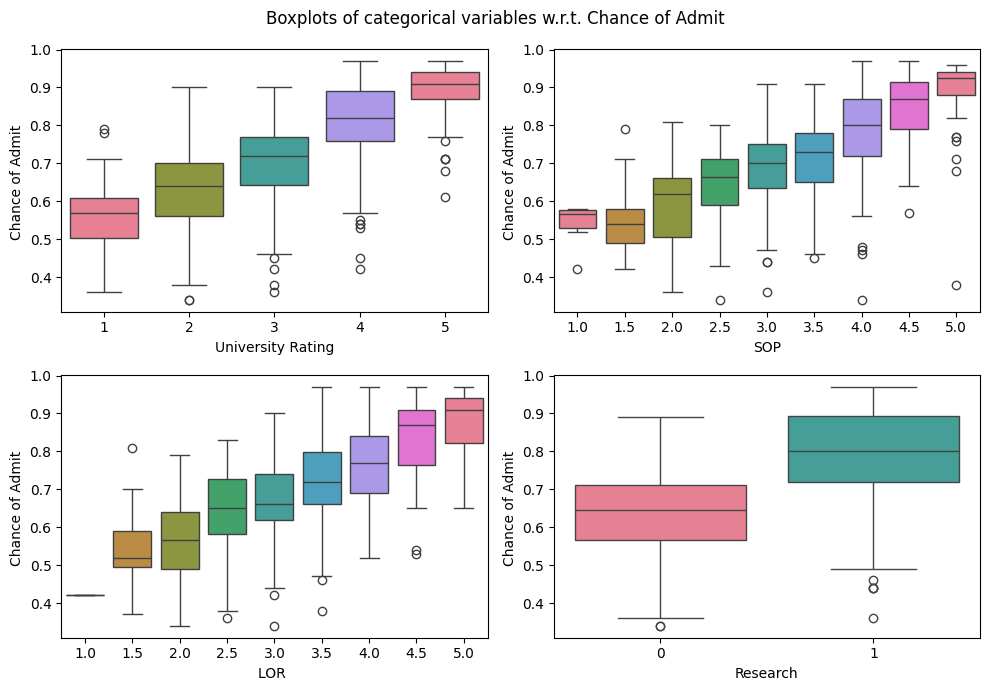

In [156]:
# Plotting boxplots of categorical variables w.r.t. Chance of Admit
fig, axs = plt.subplots(nrows=2, ncols=2,figsize=(10,7))
fig.suptitle('Boxplots of categorical variables w.r.t. Chance of Admit')

for col, axe in zip(col_name_c, axs.flatten()):
  sns.boxplot(data=df,x=col,y='Chance of Admit ',hue=col,legend=False,ax=axe,palette="husl")

plt.tight_layout()
plt.show()

1) As we can observe that as rating for University, SOP and LOR increases Chance of Admit also increases.

2) And if the students have research experience then Chance of Admit is also higher.

# **Multivariate Analysis**

In [157]:
# Finding correlation between all the features
df.drop(columns=['Serial No.']).corr().round(3)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000,0.827,0.635,0.613,0.525,0.826,0.563,0.810
TOEFL Score,0.827,1.000,0.650,0.644,0.542,0.811,0.467,0.792
University Rating,0.635,0.650,1.000,0.728,0.609,0.705,0.427,0.690
SOP,0.613,0.644,0.728,1.000,0.664,0.712,0.408,0.684
LOR,0.525,0.542,0.609,0.664,1.000,0.637,0.373,0.645
CGPA,0.826,0.811,0.705,0.712,0.637,1.000,0.501,0.882
Research,0.563,0.467,0.427,0.408,0.373,0.501,1.000,0.546
Chance of Admit,0.810,0.792,0.690,0.684,0.645,0.882,0.546,1.000


<Axes: >

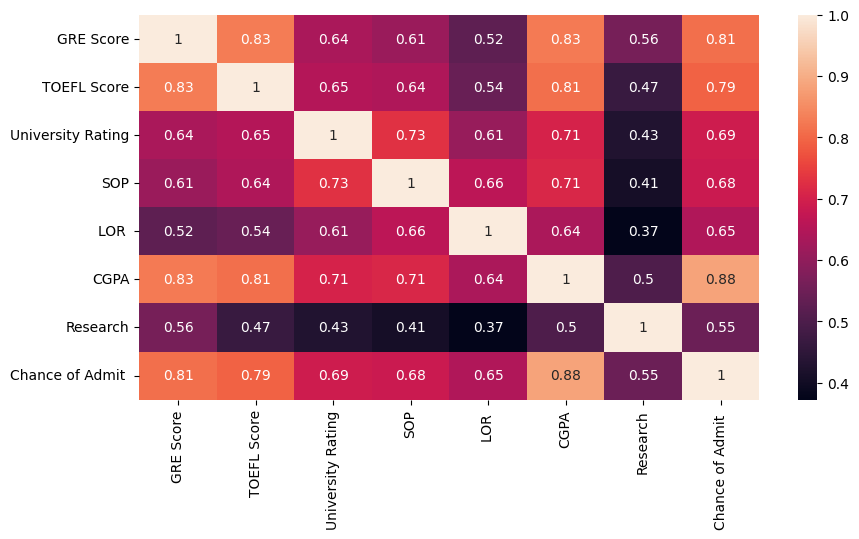

In [158]:
# Plotting heatmap of the correlation between the features for visualisation
plt.figure(figsize=(10,5))
sns.heatmap(df.drop(columns=['Serial No.']).corr(),annot=True)

1) **CGPA** and **Change of Admit** correlation        = 0.88

2) **GRE Score** and **Change of Admit** correlation   = 0.81

3) **TOEFL Score** and **Change of Admit** correlation = 0.79

4) **CGPA** and **GRE Score** correlation              = 0.83

5) **CGPA** and **TOEFL Score** correlation            = 0.81

If the students has good CGPA and he/she will have good GRE and TOEFL Score and therefore Chance of admission increases.


# **Data Pre-Processing**

In [159]:
# Dropping the unique row identifier
df_p = df.drop(['Serial No.'],axis=1)

In [160]:
# After dropping 'Seral NO.' column
df_p.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [161]:
# Checking for missing values
df_p.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [162]:
# Checking for duplicate values
df_p.duplicated().any()

False

There is no missing data points and no duplicate data points.

There are no outliers which we have already checked in univariate analysis.

In [163]:
# Separating features and target variable
x = df_p.drop(['Chance of Admit '],axis=1)
y = df_p['Chance of Admit ']

In [164]:
# Splitting of data into train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [165]:
print('Shape of x_train',x_train.shape)
print('Shape of y_train',y_train.shape)
print('Shape of x_test',x_test.shape)
print('Shape of y_test',y_test.shape)

Shape of x_train (400, 7)
Shape of y_train (400,)
Shape of x_test (100, 7)
Shape of y_test (100,)


In [166]:
# n = no. of data points/samples
# d = no. of features

n = y.shape[0]
d = x.shape[1]
col = x_train.columns
print('No. of samples: ',n)
print('No. of features: ',d)

No. of samples:  500
No. of features:  7


In [167]:
# Scaling the data
scaler=StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# **Model building**

In [168]:
# Adjusted R2 function
def adj_r2(R2,x):
  n = x.shape[0]
  d = x.shape[1]
  adj_R2 = 1-((1- R2)*(n-1)/(n-d-1))
  return adj_R2

# Model fitting
def jamboree(mod,x1,x2,y1,y2):
  model = mod
  model.fit(x1,y1)

  y_pred_train = model.predict(x1)
  y_pred_test = model.predict(x2)

  weights = np.round(model.coef_,3)
  intercept = np.round(model.intercept_,3)
  R2_train = model.score(x1,y1)
  R2_test = model.score(x2,y2)

  return (y_pred_train, y_pred_test, weights, intercept, R2_train, R2_test)

# Metrics of the data
def metrics(x,y1,y2,R2):
  MAE = mean_absolute_error(y1, y2)
  print("MAE: ", np.round(MAE,3))

  MSE = mean_squared_error(y1, y2)
  print("MSE: ", np.round(MSE,3))

  RMSE = np.sqrt(MSE)
  print("RMSE: ", np.round(RMSE,3))

  print("R2: ", np.round(R2,3))

  adj_R2 = adj_r2(R2,x)
  print("Adjusted R2: ", np.round(adj_R2,3))

def weights_display(weights,intercept):
  # Model weights and Bias
  print('\n')
  weights_df = pd.DataFrame({'Columns':col,'Weights_of_columns':weights})
  print(weights_df,'\n')

  print('Model intercept: ',intercept)

  # Visualising weights of the features
  plt.figure(figsize=(6,4))
  sns.barplot(data=weights_df,x='Columns',y='Weights_of_columns')
  plt.xticks(rotation=90)
  plt.show()

Model: Linear Regression 

Metrics of train data 

MAE:  0.043
MSE:  0.004
RMSE:  0.06
R2:  0.822
Adjusted R2:  0.818


Metrics of test data 

MAE:  0.04
MSE:  0.003
RMSE:  0.059
R2:  0.821
Adjusted R2:  0.807


             Columns  Weights_of_columns
0          GRE Score               0.021
1        TOEFL Score               0.020
2  University Rating               0.007
3                SOP               0.003
4               LOR                0.014
5               CGPA               0.071
6           Research               0.010 

Model intercept:  0.721


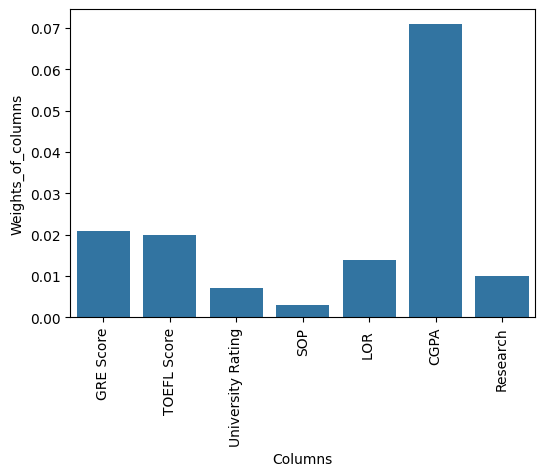

In [169]:
# Fitting of Linear regression model
print('Model: Linear Regression','\n')
y_pred_train, y_pred_test, weights, intercept, R2_train, R2_test = jamboree(LinearRegression(), x_train_scaled, x_test_scaled, y_train, y_test)
print('Metrics of train data','\n')
metrics(x_train_scaled, y_train, y_pred_train, R2_train)
print('\n')
print('Metrics of test data','\n')
metrics(x_test_scaled, y_test, y_pred_test, R2_test)
weights_display(weights,intercept)

As R2_score and Adjusted_R2_score of training data and as well as test data are same that implies that there is no overfitting of the model.

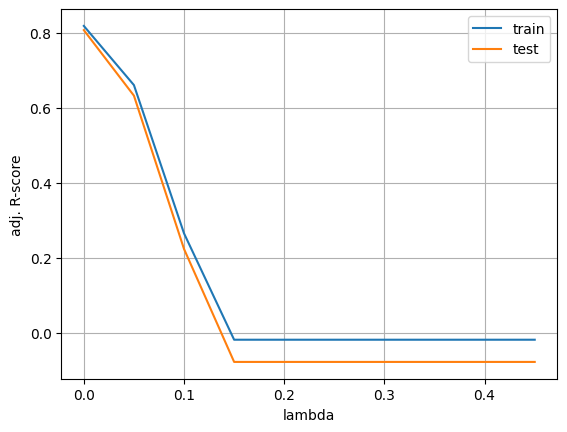

Best lamda:  0.0001


In [170]:
lamda = np.arange(0.0001,0.5,0.05)
train_scores=[]
test_scores=[]
for i in range(len(lamda)):
   y_pred_train, y_pred_test, weights, intercept, R2_train, R2_test = jamboree(Lasso(alpha=lamda[i]), x_train_scaled, x_test_scaled, y_train, y_test)
   train_scores.append(adj_r2(R2_train,x_train_scaled))
   test_scores.append(adj_r2(R2_test,x_test_scaled))


plt.figure()
plt.plot(lamda, train_scores, label="train")
plt.plot(lamda, test_scores, label="test")
plt.legend()
plt.xlabel("lambda")
plt.ylabel("adj. R-score")
plt.grid()
plt.show()

best_lamda = lamda[np.argmax(test_scores)]
print('Best lamda: ',best_lamda)

Model: Linear Regression with Regularization : Lasso 

Metrics of train data 

MAE:  0.043
MSE:  0.004
RMSE:  0.06
R2:  0.822
Adjusted R2:  0.818


Metrics of test data 

MAE:  0.04
MSE:  0.003
RMSE:  0.059
R2:  0.821
Adjusted R2:  0.807


             Columns  Weights_of_columns
0          GRE Score               0.021
1        TOEFL Score               0.020
2  University Rating               0.007
3                SOP               0.003
4               LOR                0.013
5               CGPA               0.071
6           Research               0.010 

Model intercept:  0.721


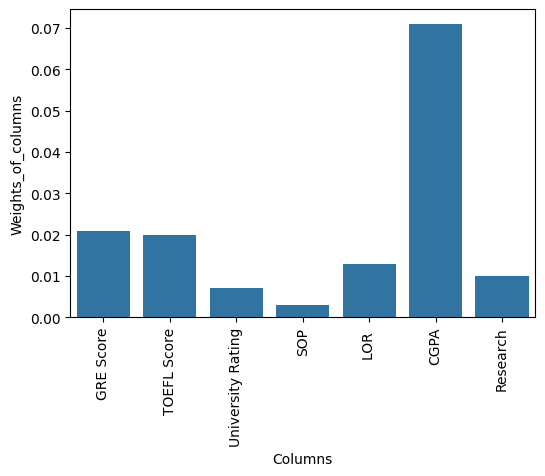

In [171]:
# Fitting of Lasso model
print('Model: Linear Regression with Regularization : Lasso','\n')
y_pred_train, y_pred_test, weights, intercept, R2_train, R2_test = jamboree(Lasso(alpha=best_lamda), x_train_scaled, x_test_scaled, y_train, y_test)
print('Metrics of train data','\n')
metrics(x_train_scaled, y_train, y_pred_train, R2_train)
print('\n')
print('Metrics of test data','\n')
metrics(x_test_scaled, y_test, y_pred_test, R2_test)
weights_display(weights,intercept)

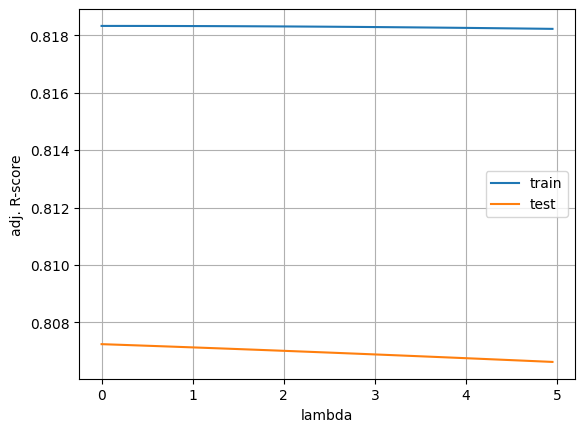

Best lamda:  0.0001


In [172]:
lamda = np.arange(0.0001,5,0.05)
train_scores=[]
test_scores=[]
for i in range(len(lamda)):
   y_pred_train, y_pred_test, weights, intercept, R2_train, R2_test = jamboree(Ridge(alpha=lamda[i]), x_train_scaled, x_test_scaled, y_train, y_test)
   train_scores.append(adj_r2(R2_train,x_train_scaled))
   test_scores.append(adj_r2(R2_test,x_test_scaled))


plt.figure()
plt.plot(lamda, train_scores, label="train")
plt.plot(lamda, test_scores, label="test")
plt.legend()
plt.xlabel("lambda")
plt.ylabel("adj. R-score")
plt.grid()
plt.show()

best_lamda = lamda[np.argmax(test_scores)]
print('Best lamda: ',best_lamda)

Model: Linear Regression with Regularization : Ridge 

Metrics of train data 

MAE:  0.043
MSE:  0.004
RMSE:  0.06
R2:  0.822
Adjusted R2:  0.818


Metrics of test data 

MAE:  0.04
MSE:  0.003
RMSE:  0.059
R2:  0.821
Adjusted R2:  0.807


             Columns  Weights_of_columns
0          GRE Score               0.021
1        TOEFL Score               0.020
2  University Rating               0.007
3                SOP               0.003
4               LOR                0.014
5               CGPA               0.071
6           Research               0.010 

Model intercept:  0.721


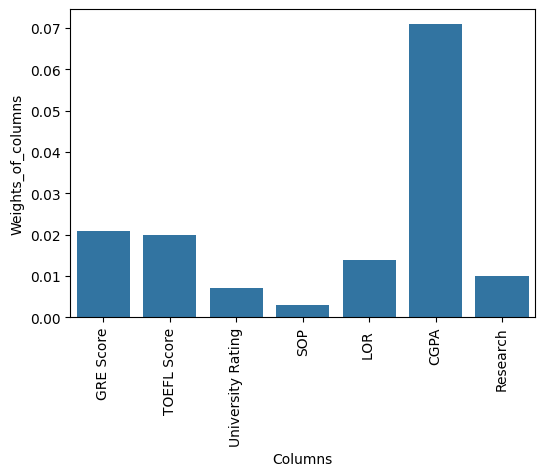

In [173]:
# Fitting of Ridge model
print('Model: Linear Regression with Regularization : Ridge','\n')
y_pred_train, y_pred_test, weights, intercept, R2_train, R2_test = jamboree(Ridge(alpha=best_lamda), x_train_scaled, x_test_scaled, y_train, y_test)
print('Metrics of train data','\n')
metrics(x_train_scaled, y_train, y_pred_train, R2_train)
print('\n')
print('Metrics of test data','\n')
metrics(x_test_scaled, y_test, y_pred_test, R2_test)
weights_display(weights,intercept)

***For Linear Regression model, Lasso Regression model, Ridge Regression model  : ***

CGPA, GRE score and TOEFL Score have the highest weights.

SOP, University rating, Research have the lowest weights.

# **Testing the assumptions of the linear regression model**

Assumptions of Linear regression:

1) Assumption of linearity

2) No multicollinearity

3) Normality of residuals

4) No heteroskadasticity

5) No autocorrelation

**Assumption of linearity**

Linearity of variables says that there is a linear relationship between the independent variables and the target variable. A linear relationship suggests that a change in response Y due to one unit change in X¹ is constant, regardless of the value of X¹.

Linearity can be checked by residual plot :residual vs fitted value. If there is linearity then there should not be any pattern in the residual plot. it should be randomly scattered around zero showing no pattern.

If any type of shape is observed like curved, funnel shape then it can be said that assumption of linearity is not met.

<Axes: ylabel='Chance of Admit '>

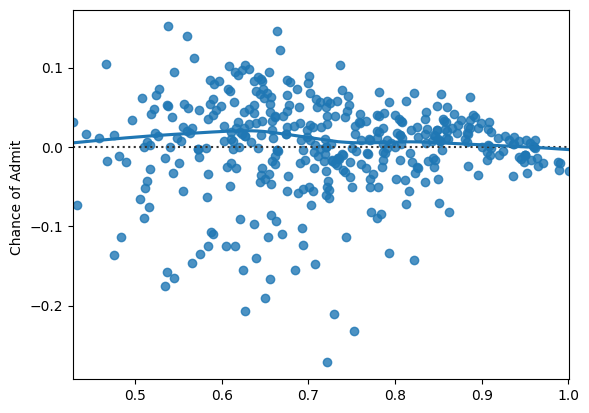

In [174]:
model=LinearRegression()
model.fit(x_train_scaled,y_train)
y_train_pred = model.predict(x_train_scaled)
res = y_train - y_train_pred
sns.residplot(x=y_train_pred,y=res,lowess=True)

From the above plot, we can observe that there is no pattern and can be concluded that it shows linearity.

**No multicollinearity**

VIF (Variance Inflation Factor) checks for multicollinearity in a regression analysis.

VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable. “

or

VIF score of an independent variable represents how well the variable is explained by other independent variables.

VIF(j) = 1 /(1- R(j)^2)


In [175]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_t = pd.DataFrame(x_train, columns = x_train.columns)
vif = pd.DataFrame()
vif['Features'] = x_t.columns
vif['VIF'] = [variance_inflation_factor(x_t.values,i) for i in range(x_t.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif)

            Features      VIF
0          GRE Score  1371.11
1        TOEFL Score  1266.69
2  University Rating    21.45
3                SOP    34.73
4               LOR     30.89
5               CGPA   941.67
6           Research     2.80


In [176]:
# As VIF score is highest for GRE Score so dropping 'GRE Score' column
x_t.drop(columns=['GRE Score'],inplace=True)

In [177]:
# Calculating VIF score again after dropping 'GRE Score' column
vif = pd.DataFrame()
vif['Features'] = x_t.columns
vif['VIF'] = [variance_inflation_factor(x_t.values,i) for i in range(x_t.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif)

            Features     VIF
0        TOEFL Score  641.91
1  University Rating   20.59
2                SOP   32.93
3               LOR    30.59
4               CGPA  721.92
5           Research    2.78


In [178]:
# As VIF score is highest for TOEFL Score so dropping 'TOEFL Score' column
x_t.drop(columns=['TOEFL Score'],inplace=True)

In [179]:
# Calculating VIF score again after dropping 'TOEFL Score' column
vif = pd.DataFrame()
vif['Features'] = x_t.columns
vif['VIF'] = [variance_inflation_factor(x_t.values,i) for i in range(x_t.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif)

            Features    VIF
0  University Rating  20.49
1                SOP  32.84
2               LOR   30.42
3               CGPA  23.73
4           Research   2.77


In [180]:
# Now again train the model with these features
# Splitting of data into train and test data
x_1 = df_p[['University Rating','SOP','CGPA','Research']]
y_1 = df_p['Chance of Admit ']

x_train_r, x_test_r, y_train_r, y_test_r = train_test_split(x_1,y_1, test_size=0.2, random_state=1)

In [181]:
print('Shape of x_train_r',x_train_r.shape)
print('Shape of y_train_r',y_train_r.shape)
print('Shape of x_test_r',x_test_r.shape)
print('Shape of y_test_r',y_test_r.shape)

Shape of x_train_r (400, 4)
Shape of y_train_r (400,)
Shape of x_test_r (100, 4)
Shape of y_test_r (100,)


In [182]:
# n = no. of data points/samples
# d = no. of features

n = y_1.shape[0]
d = x_1.shape[1]
col = x_train_r.columns
print('No. of samples: ',n)
print('No. of features: ',d)

No. of samples:  500
No. of features:  4


In [183]:
# Scaling the data
scaler=StandardScaler()
x_train_r_scaled = scaler.fit_transform(x_train_r)
x_test_r_scaled = scaler.transform(x_test_r)

Model: Linear Regression 

Metrics of train data 

MAE:  0.046
MSE:  0.004
RMSE:  0.063
R2:  0.799
Adjusted R2:  0.797


Metrics of test data 

MAE:  0.042
MSE:  0.004
RMSE:  0.061
R2:  0.806
Adjusted R2:  0.798


             Columns  Weights_of_columns
0  University Rating               0.014
1                SOP               0.009
2               CGPA               0.101
3           Research               0.015 

Model intercept:  0.721


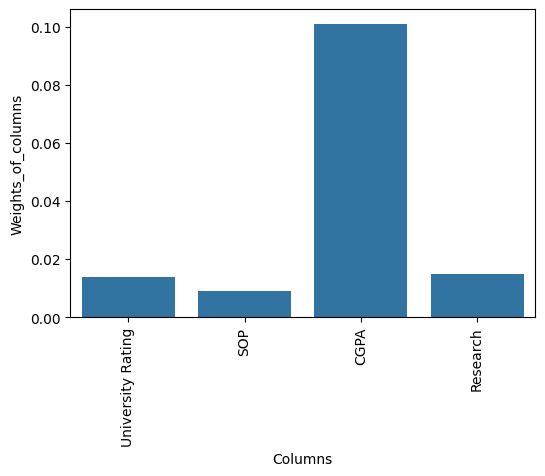

In [185]:
# Fitting of Linear regression model
print('Model: Linear Regression','\n')
y_pred_train, y_pred_test, weights, intercept, R2_train, R2_test = jamboree(LinearRegression(), x_train_r_scaled, x_test_r_scaled, y_train_r, y_test_r)
print('Metrics of train data','\n')
metrics(x_train_r_scaled, y_train_r, y_pred_train, R2_train)
print('\n')
print('Metrics of test data','\n')
metrics(x_test_r_scaled, y_test_r, y_pred_test, R2_test)
weights_display(weights,intercept)

We observe that there is collinearity between GRE score, TOEFL score and CGPA.
Correlation heatmap also showed strong positive correlation between GRE score, TOEFL score and CGPA.

Therefore after removing GRE score, TOEFL score columns we dont see much drop in R2 and Adjusted_R2 scores for all the models.

**Mean of Residuals**

The mean of residuals represents the average of residual values in a regression model.

The mean of residuals helps in understanding whether the regression model is biased or not. If the model is unbiased then mean would be close to zero. If it very far from zero, then we can say that the model would overestimate or underestimate the observed values.

Also from the distribution of the residuals we can conclude whether the model is biased or not.If it shows normal distribution then it is not biased otherwise it is.

In [186]:
res_mean = res.mean()
print(res_mean)

-4.718447854656915e-17


As the mean is close to zero that means it is unbiased.

**Normality of residuals**

Normality of residuals says that the residuals (or errors) in the model are normally distributed.

Normality is important because it allows for statistical tests and the validity of confidence intervals and hypothesis tests.

<Axes: xlabel='Chance of Admit ', ylabel='Count'>

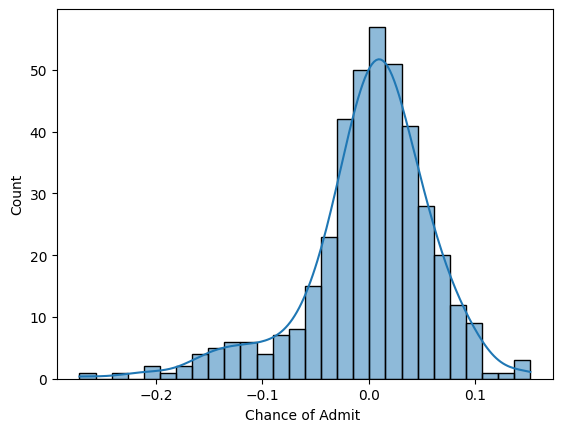

In [187]:
sns.histplot(res,kde=True)

In [188]:
from scipy import stats
resi = stats.shapiro(res)
resi.statistic

0.9360626935958862

As the distribution of residual is normal and the shapirp statistic is also close to 1 that means normality of residual is there.

**Heteroskedasticity**

Homoscedasticity refers the spread of the residuals should be similar across different values of the predictors.

To test it scatteplot can be used and if the graph is conical in shape then that means data is not suited for linear regression.

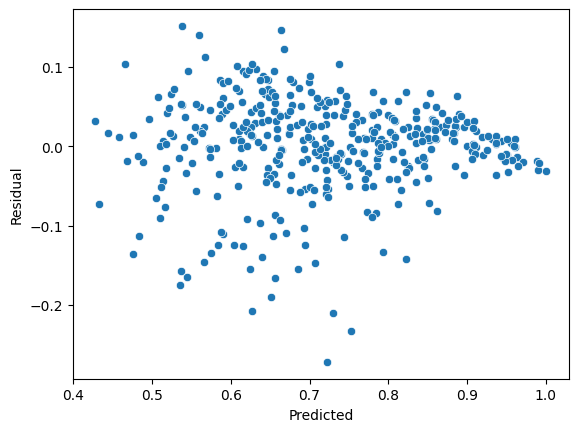

In [189]:
sns.scatterplot(x = y_train_pred, y = res)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.show()

Since the plot is not creating a cone type shape. Hence there is no homoskedasticity present in the data.

**No Auto-correlation**

The presence of correlation in error terms drastically reduces model’s accuracy. This usually occurs in time series models where the next instant is dependent on previous instant. If the error terms are correlated, the estimated standard errors tend to underestimate the true standard error.

It can be checked by Durbin – Watson (DW) statistic. It must lie between 0 and 4. If DW = 2, implies no autocorrelation, 0 < DW < 2 implies positive autocorrelation while 2 < DW < 4 indicates negative autocorrelation.

In [190]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(res)

1.9322545734103673

As the Durbin – Watson (DW) statistic is almost =2 that  means there is no autocorrelation.

# **Actionable Insights & Recommendations**

**Insights:**

CGPA, GRE and TOEFL Scores are strongly related with chance of admit. These variables are also related to each other (collinear to each other).

After removing GRE Score and TOEFL Score, accuracy of the model almost remained the same.

By looking at model coefficients/weights, we can say that CGPA is the most significant feature while SOP/University Rating are the least significant.

All Linear Regression, Lasso and Ridge Regression models have captured upto 82%.

**Recommendations:**

CGPA, LORs, SOP and Research experience are enough for better prediction.

Awareness of CGPA and Research Capabilities : Seminars can be organised to increase the awareness regarding CGPA and Research Capabilities to enhance the chance of admission.

Education institutes can not just help student to improve their CGPA score but also assist them writing good LOR and SOP thus helping them admit to better university.